ML Model

In [74]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import concat
import numpy as np
from math import sqrt

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib import colors
%matplotlib inline

In [75]:
df = pd.read_csv("D:\DESKTOP\DE_CW_DEMINI\HCHO-Measurements\DE CW\____Filtered_Data_ALL_Loacation.csv")
df.head()

,HCHO Reading,Current Date,Next Date,Location
0,0.000263,2019-01-02,2019-01-03,Colombo Proper
1,0.000099,2019-01-03,2019-01-04,Colombo Proper
2,0.000210,2019-01-04,2019-01-05,Colombo Proper
3,0.000179,2019-01-05,2019-01-06,Colombo Proper
4,0.000108,2019-01-06,2019-01-07,Colombo Proper


In [76]:
import pandas as pd

# Load your dataset into DataFrame 'data'
data = pd.read_csv("D:\DESKTOP\DE_CW_DEMINI\HCHO-Measurements\DE CW\____Filtered_Data_ALL_Loacation.csv")

# Convert the 'ending date' and 'current date' columns to datetime data type
data['Next Date'] = pd.to_datetime(data['Next Date'])
data['Current Date'] = pd.to_datetime(data['Current Date'])

# Display the updated data types of columns
print(data.dtypes)


HCHO Reading           float64
Current Date    datetime64[ns]
Next Date       datetime64[ns]
Location                object
dtype: object


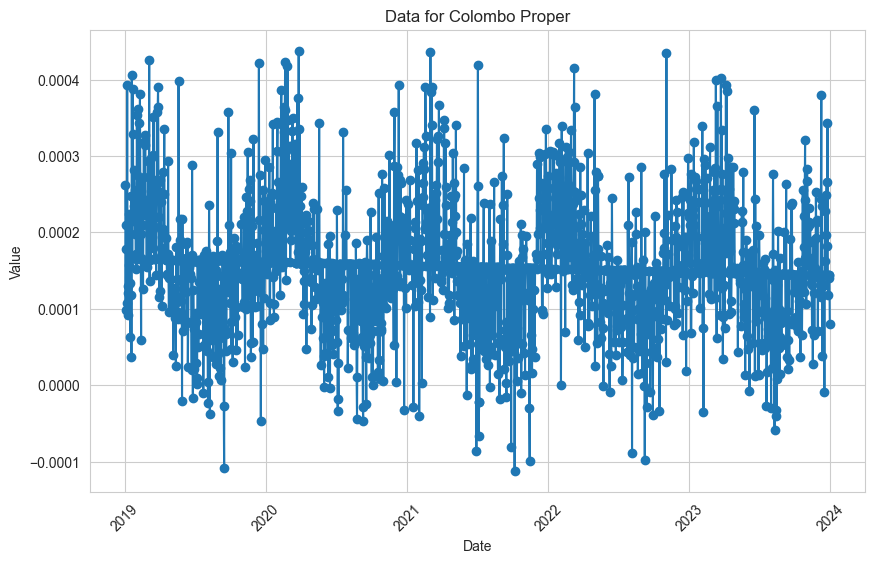

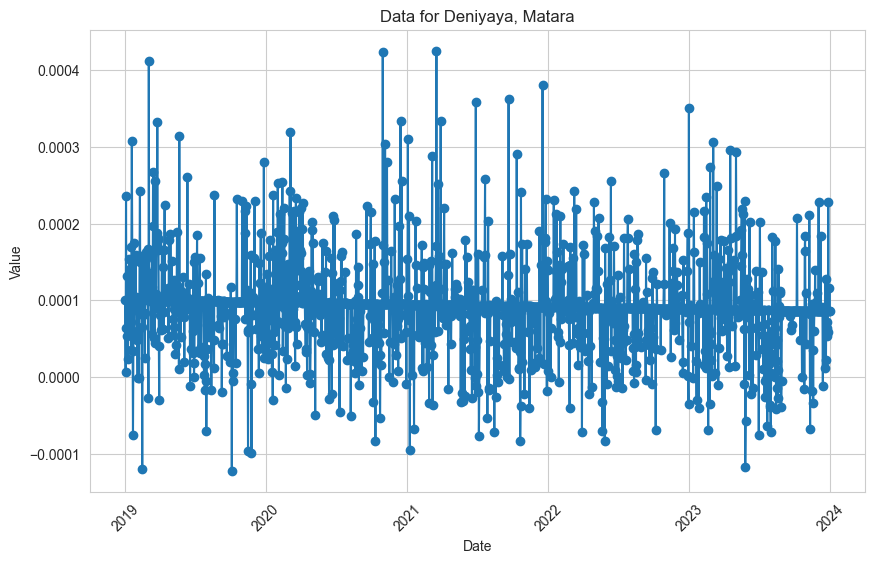

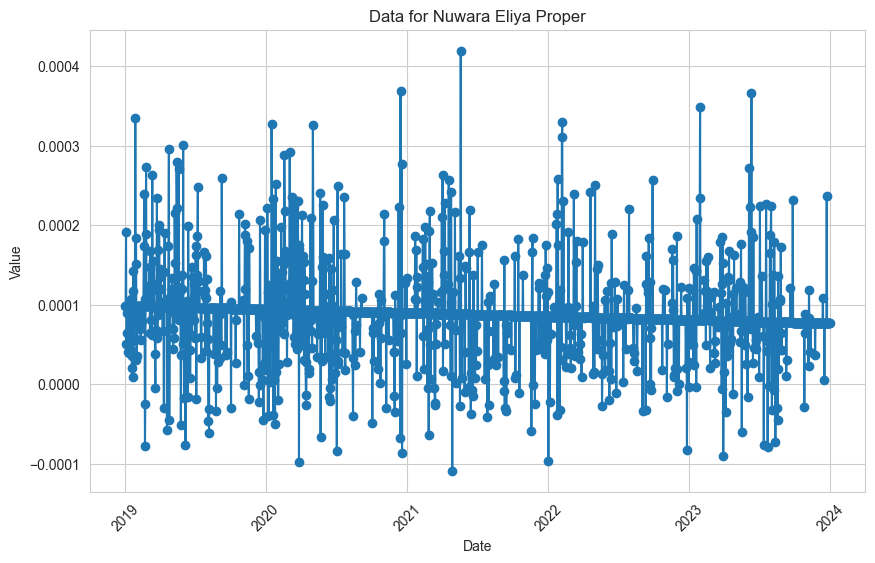

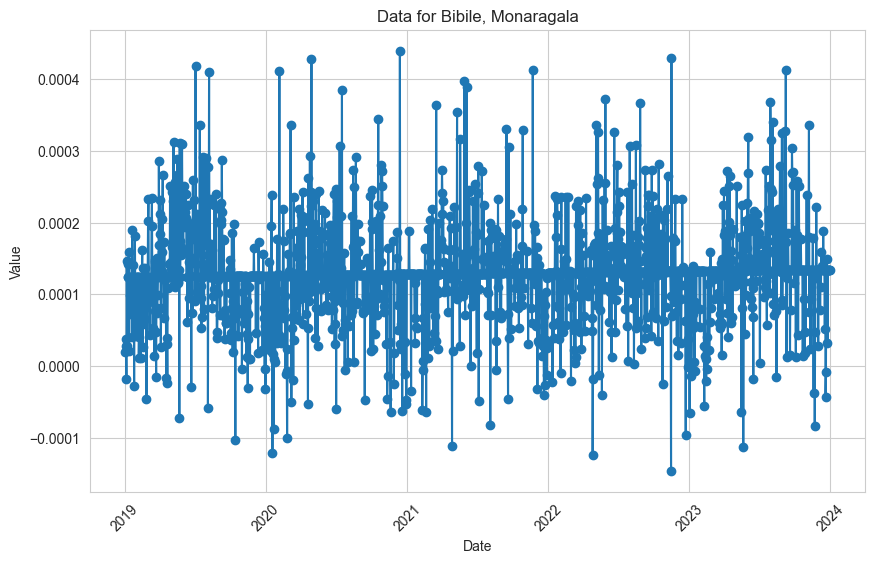

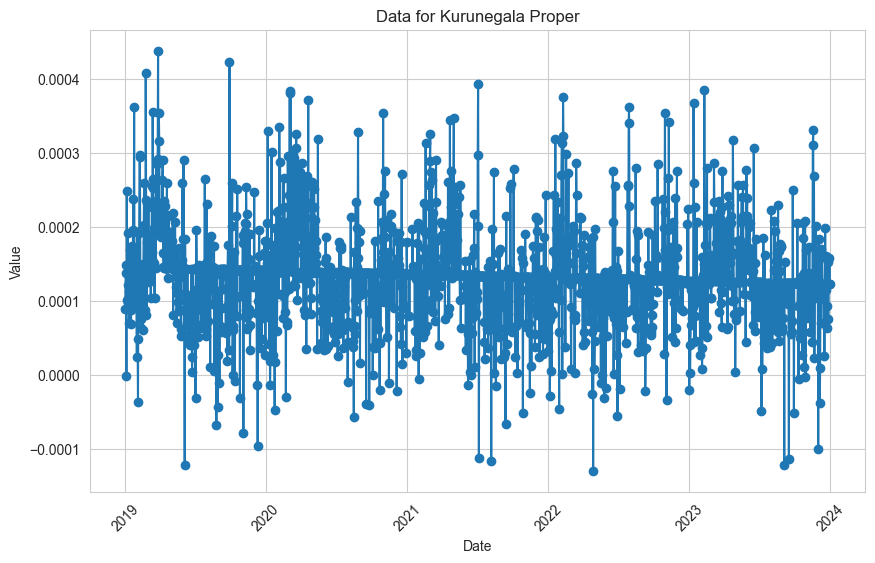

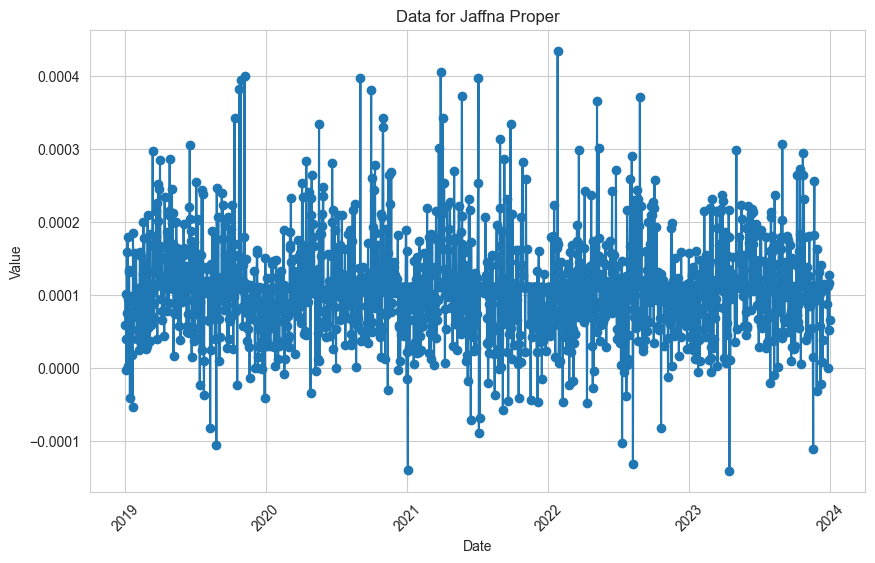

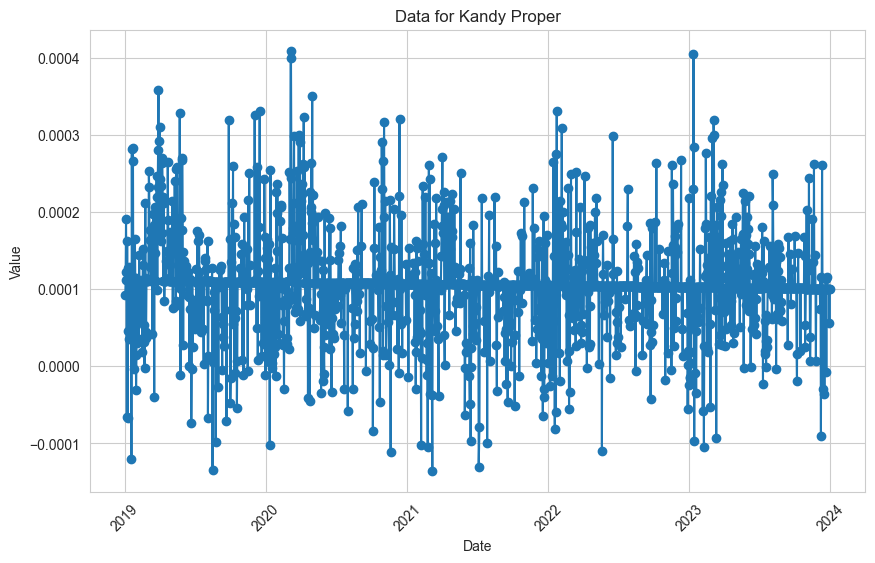

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Get unique values in the "Location" column
unique_locations = data['Location'].unique()

# Plot separate graphs for each location
for location in unique_locations:
    # Filter data for the current location
    location_data = data[data['Location'] == location]
    
    # Plot graph for the current location
    plt.figure(figsize=(10, 6))
    plt.plot(location_data['Current Date'], location_data['HCHO Reading'], marker='o', linestyle='-')
    plt.title(f"Data for {location}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

predictions

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Evaluation Metrics
RMSE: 7.553620187615052e-05
MAE: 5.766946916146683e-05
MAPE: 177.03958376981973
R2: 0.12454767032924863


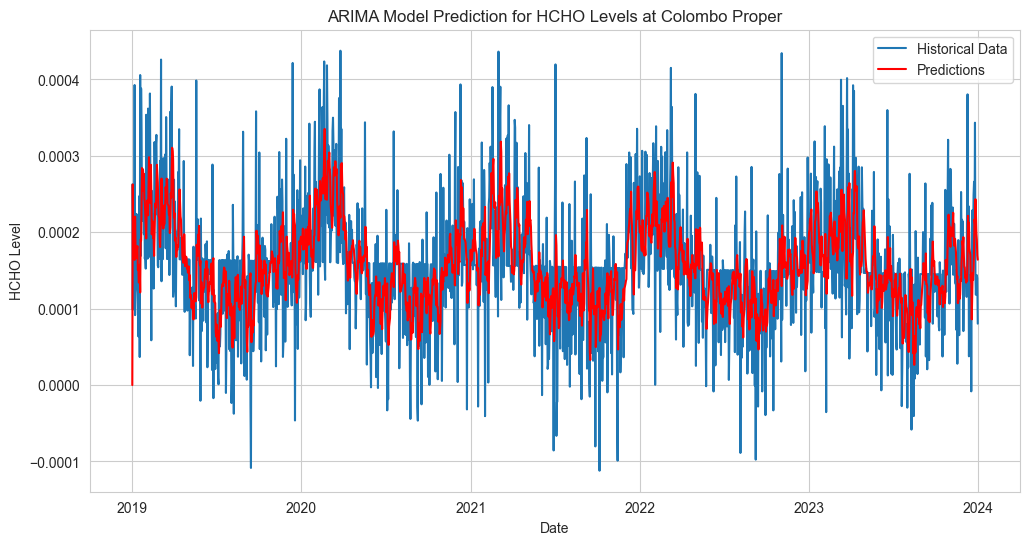

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Evaluation Metrics
RMSE: 6.1520068811585e-05
MAE: 4.183719017677361e-05
MAPE: 565.914614076791
R2: -0.09449111063717353


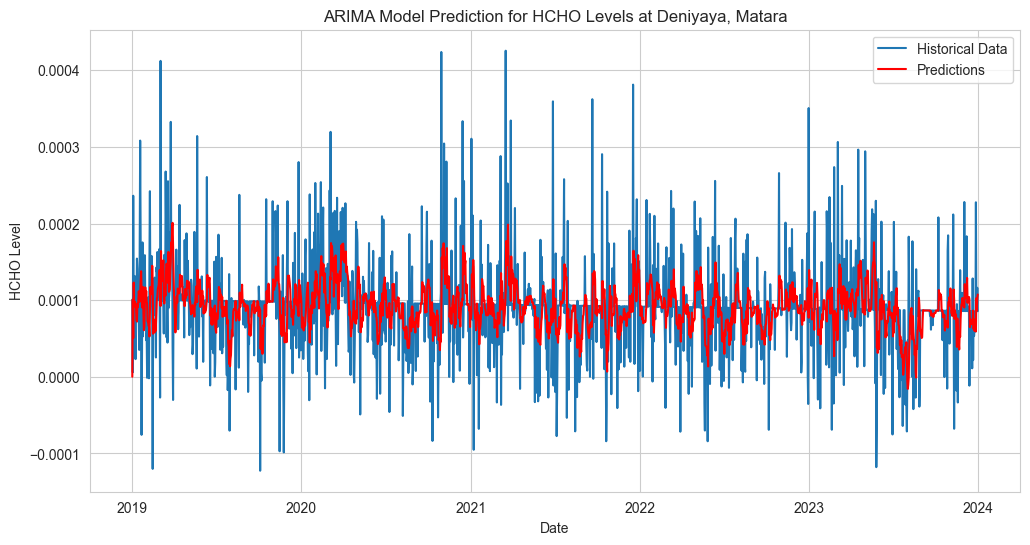

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

Evaluation Metrics
RMSE: 5.5248117875821046e-05
MAE: 3.455957063181272e-05
MAPE: 129.90191832026144
R2: -0.11885495415973923


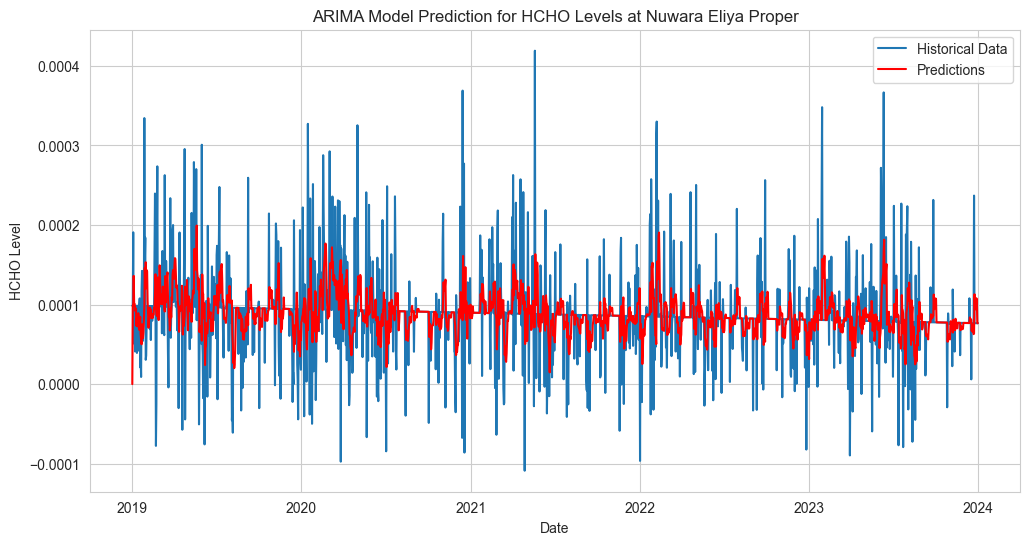

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

Evaluation Metrics
RMSE: 7.070763327407069e-05
MAE: 5.055395758052661e-05
MAPE: 151.12607611964648
R2: -0.02286133167708959


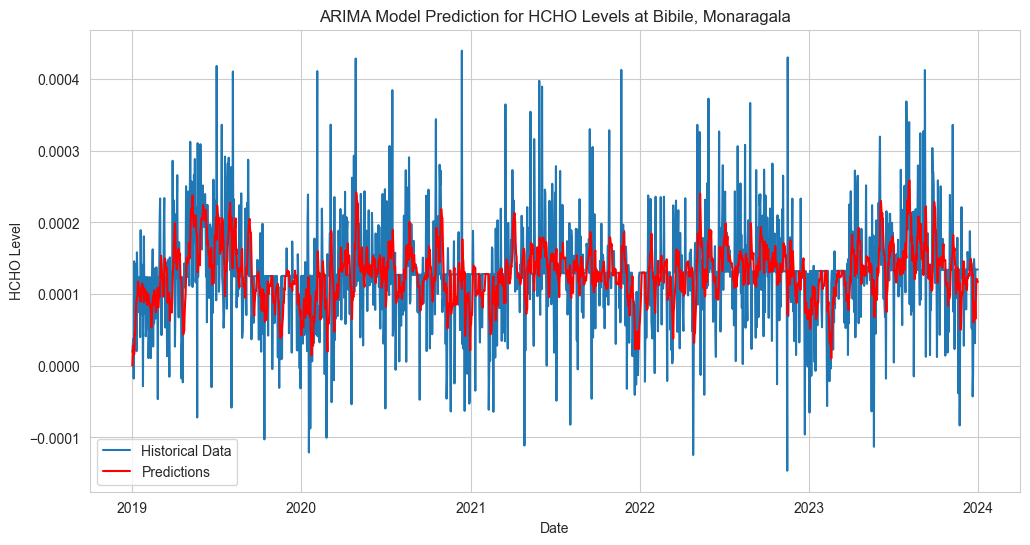

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Evaluation Metrics
RMSE: 6.810082763594964e-05
MAE: 4.949288675869541e-05
MAPE: 282.0519565918936
R2: 0.00864041236360047


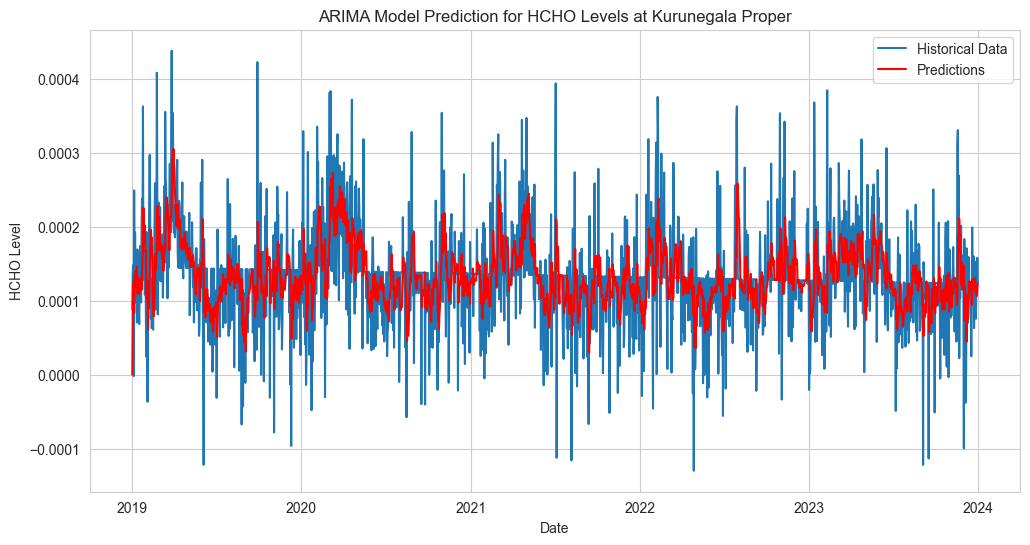

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

Evaluation Metrics
RMSE: 6.733498539643362e-05
MAE: 4.974005779343034e-05
MAPE: 241.4819873723593
R2: -0.09380485279665285


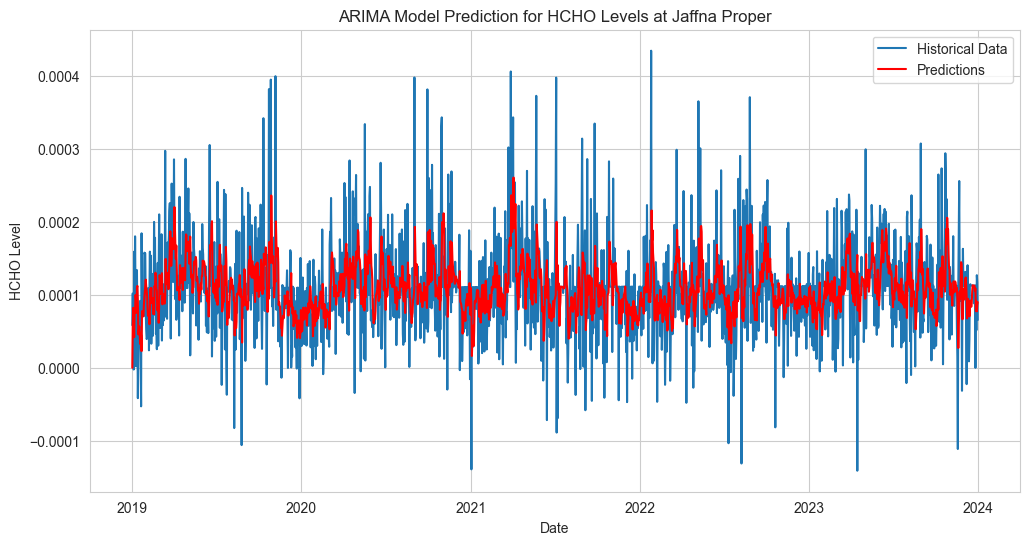

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

Evaluation Metrics
RMSE: 6.619412797964344e-05
MAE: 4.563982366701178e-05
MAPE: 169.34506372400594
R2: -0.04946640861756535


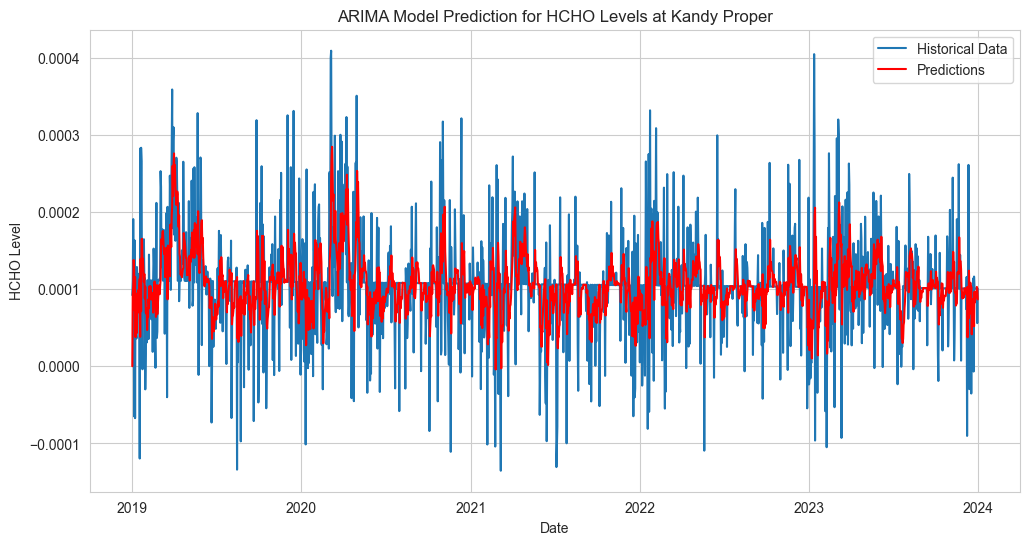

In [81]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score




# Load your dataset into DataFrame 'data'
data = pd.read_csv("D:\DESKTOP\DE_CW_DEMINI\HCHO-Measurements\DE CW\____Filtered_Data_ALL_Loacation.csv")

# Convert 'Current Date' column to datetime format and set as index
if 'Current Date' in data.columns:
    data['Current Date'] = pd.to_datetime(data['Current Date'])
    data.set_index('Current Date', inplace=True)
else:
    raise KeyError("Column 'Current Date' not found in the dataset.")

# Check for missing values and drop them
data = data.dropna()

# Get unique values in the 'Location' column
locations = data['Location'].unique()

# Iterate over each location
for location in locations:
    # Filter the dataset for the current location
    location_data = data[data['Location'] == location]
    
    # Extract the column containing HCHO levels
    hcho_data = location_data['HCHO Reading']
    
    # Fit ARIMA model
    order = (5, 1, 0)  # Example order, you can tune this
    model = ARIMA(hcho_data, order=order)
    fitted_model = model.fit()
    
    # Make predictions
    predictions = fitted_model.predict(start=0, end=len(hcho_data)-1, typ='levels')

    # Calculate the RMSE, MAE, MAPE, and R2
    rmse = np.sqrt(mean_squared_error(hcho_data,predictions))
    mae = mean_absolute_error(hcho_data, predictions)
    mape = np.mean(np.abs((hcho_data - predictions) / hcho_data)) * 100
    r2 = r2_score(hcho_data, predictions)

    # Print the results
    print("Evaluation Metrics")
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MAPE:", mape)
    print("R2:", r2)
    
    # Plot predictions
    plt.figure(figsize=(12, 6))
    plt.plot(hcho_data.index, hcho_data, label='Historical Data')
    plt.plot(hcho_data.index, predictions, label='Predictions', color='red')
    plt.title(f'ARIMA Model Prediction for HCHO Levels at {location}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Level')
    plt.legend()
    plt.show()


future predictions

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

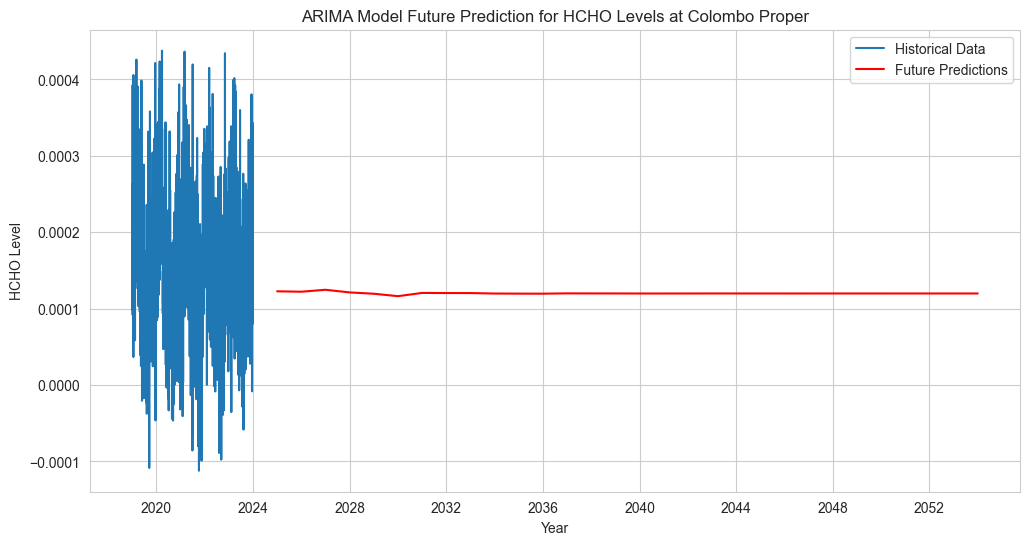

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

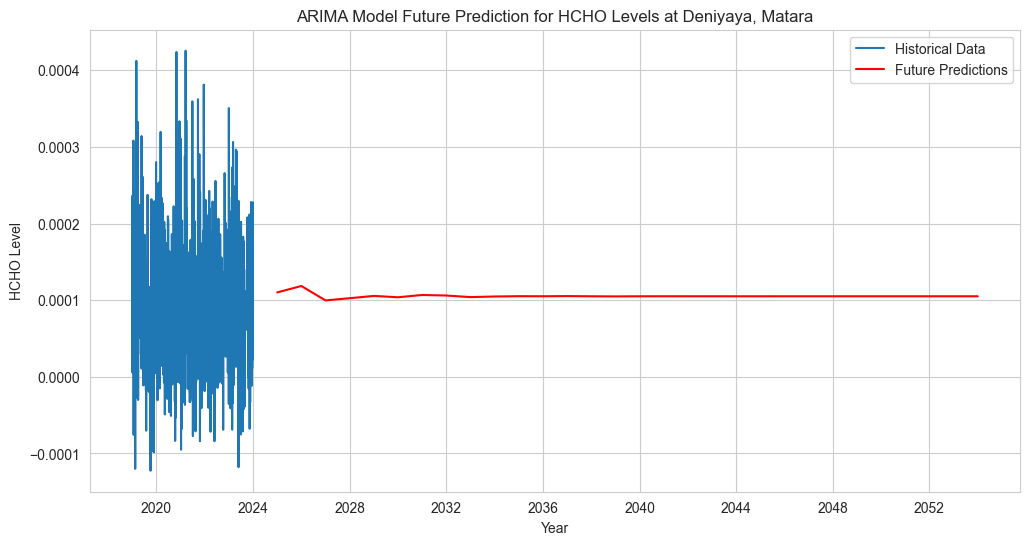

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

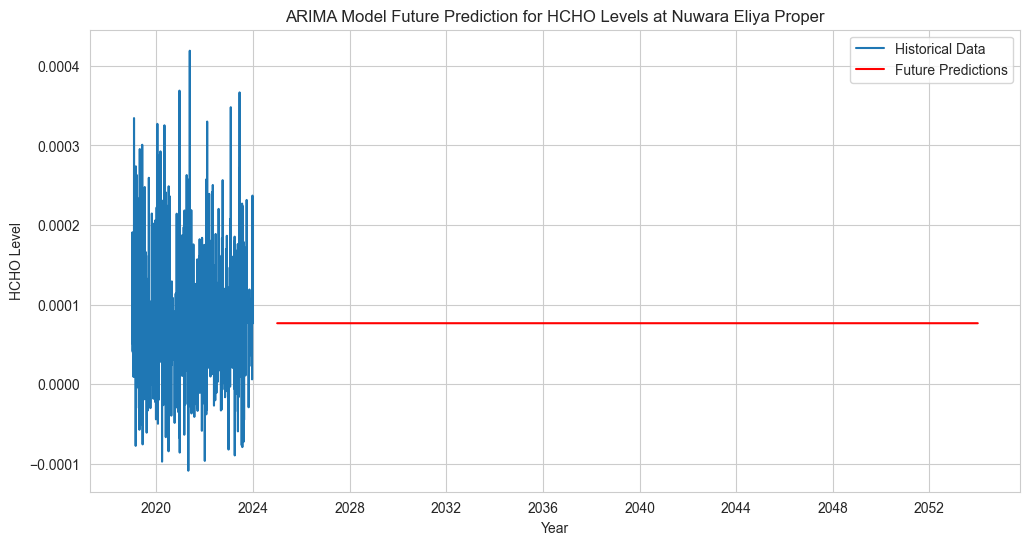

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

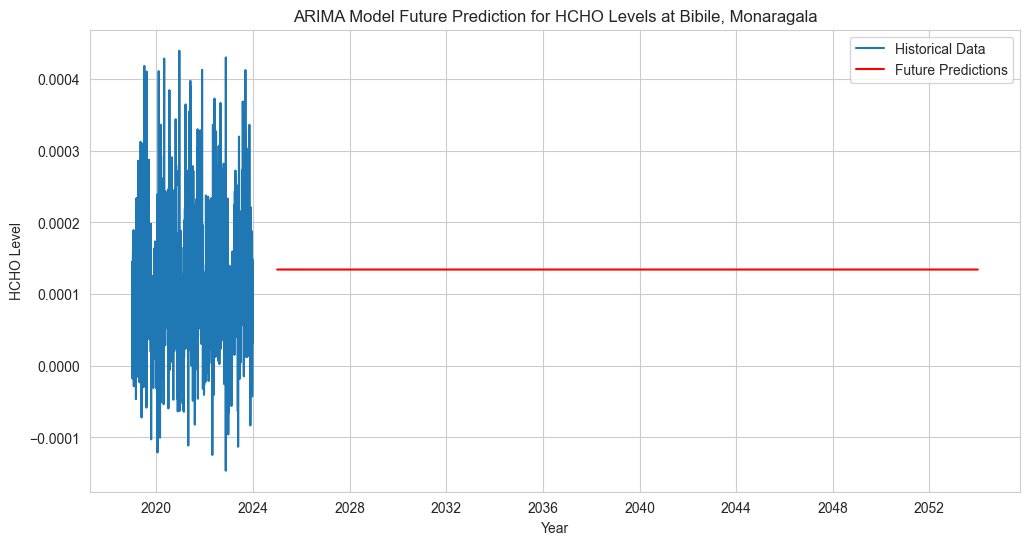

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

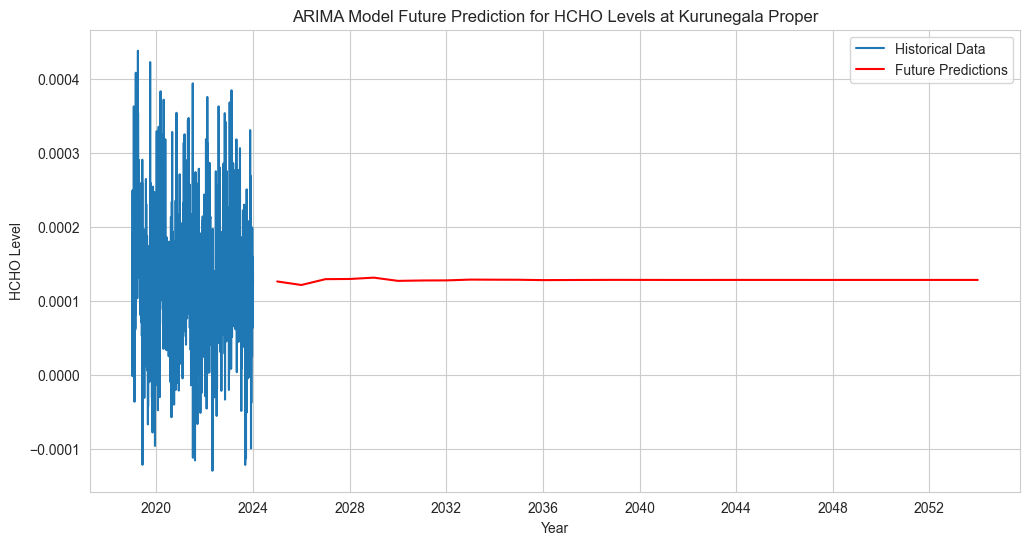

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

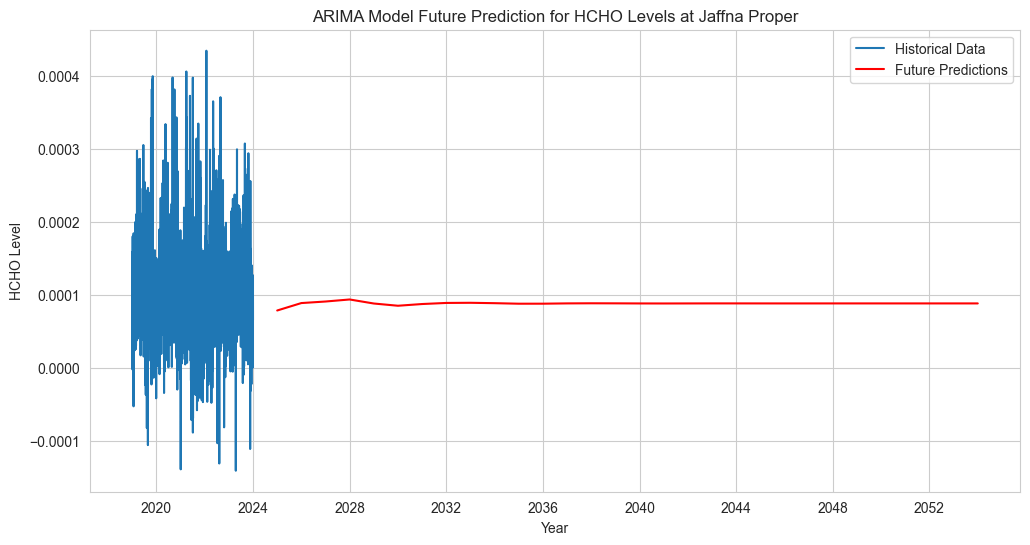

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

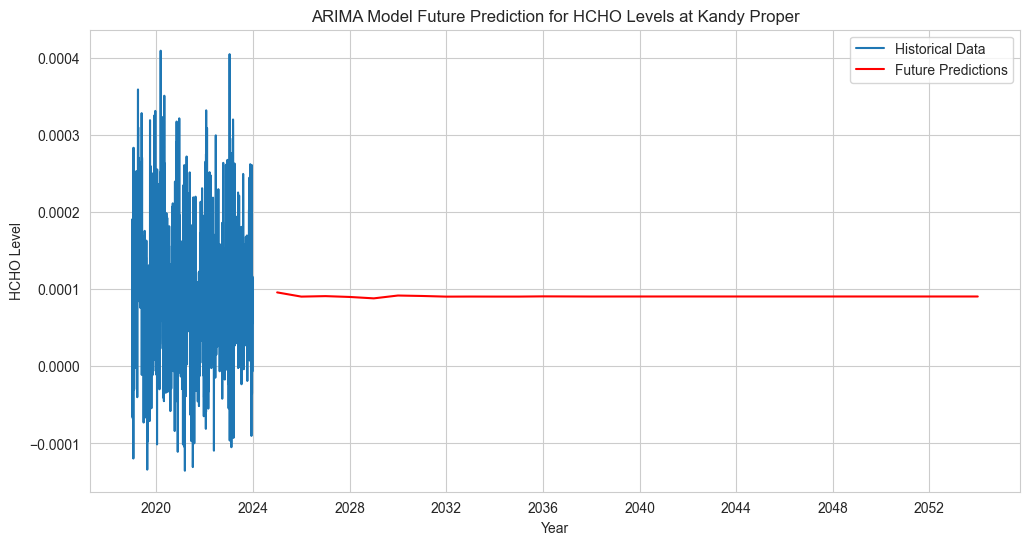

In [79]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your dataset into DataFrame 'data'
data = pd.read_csv("D:\DESKTOP\DE_CW_DEMINI\HCHO-Measurements\DE CW\____Filtered_Data_ALL_Loacation.csv")

# Convert 'Current Date' column to datetime format and set as index
if 'Current Date' in data.columns:
    data['Current Date'] = pd.to_datetime(data['Current Date'])
    data.set_index('Current Date', inplace=True)
else:
    raise KeyError("Column 'Current Date' not found in the dataset.")

# Check for missing values and drop them
data = data.dropna()

# Get unique values in the 'Location' column
locations = data['Location'].unique()

# Iterate over each location
for location in locations:
    # Filter the dataset for the current location
    location_data = data[data['Location'] == location]
    
    # Extract the column containing HCHO levels
    hcho_data = location_data['HCHO Reading']
    
    # Fit ARIMA model
    order = (5, 1, 0)  # Example order, you can tune this
    model = ARIMA(hcho_data, order=order)
    fitted_model = model.fit()
    
    # Make future predictions until the year 2050 (assuming frequency is yearly)
    future_years = pd.date_range(start=hcho_data.index[-1], periods=31, freq='Y')[1:]  # Generate future years from 2024 to 2050
    future_predictions = fitted_model.forecast(steps=len(future_years))
    
    # Plot future predictions
    plt.figure(figsize=(12, 6))
    plt.plot(hcho_data.index, hcho_data, label='Historical Data')
    plt.plot(future_years, future_predictions, label='Future Predictions', color='red')
    plt.title(f'ARIMA Model Future Prediction for HCHO Levels at {location}')
    plt.xlabel('Year')
    plt.ylabel('HCHO Level')
    plt.legend()
    plt.show()








KeyError: 'HCHO reading'